In [4]:
# Standard libraries
import sys

# External libraries
import pandas as pd
import numpy as np
from astroquery.mast import Catalogs
from matplotlib import pyplot as plt

# Internal libraries
sys.path.append("../Scripts/")
from utils import *

In [10]:
# Input globalpars.csv from SYD-PYpline
input_file = "../Data/SYD-PYplineResults/raw_twt_results.csv"
# Plot data file containing data on the processed targets
reference_file = "../Data/PlotData/tim_white_plot_data_v1.csv"
# Plot output folder
plot_output = "../Data/Plots/Comparison"
# Data output folder
data_output = "../Data/Comparison"
# Save name
save_name = "twt_comparison"
# Save flag
save = False

In [11]:
raw_data = pd.read_csv(input_file)
raw_data

,target,numax(smooth),numax(smooth)_err,maxamp(smooth),maxamp(smooth)_err,numax(gauss),numax(gauss)_err,maxamp(gauss),maxamp(gauss)_err,fwhm,fwhm_err,dnu,dnu_err
0,232621005,37.112790,1.097543,2.426761e-09,5.675499e-10,37.189890,0.730896,2.545245e-09,4.936648e-10,5.772292,0.711304,3.950761,0.097559
1,27006649,33.830168,2.539579,1.940772e-09,1.057897e-09,32.344123,2.487537,1.921162e-09,1.003799e-09,5.489801,1.592662,3.264548,0.317447
2,271353707,83.719191,4.602999,2.495911e-10,8.731789e-11,77.735726,4.551245,2.963874e-10,9.000845e-11,16.209857,5.586784,6.228884,0.634896
3,279049424,53.185981,0.542571,2.254819e-08,2.158434e-09,52.851872,0.387334,2.170947e-08,1.949524e-09,6.308708,0.404392,5.553882,0.192161
4,299214508,90.215730,0.780476,8.346137e-10,1.937210e-10,88.480515,1.220922,8.343364e-10,1.444045e-10,11.256471,1.156683,3.475687,0.463408
5,382276084,285.298340,2.921803,1.499085e-10,1.608136e-11,286.071028,1.795384,1.635184e-10,1.532371e-11,28.694735,0.881453,18.957837,0.169380
6,416282724,24.409217,1.904693,3.381920e-09,2.279591e-09,25.569469,1.788563,3.716940e-09,2.036366e-09,4.084410,1.000622,2.784332,0.317449
7,441712711,25.968836,1.552478,4.735121e-09,2.188634e-09,25.979839,1.285667,4.875824e-09,2.164960e-09,4.091537,1.285852,2.736412,0.310496
8,57192070,76.136693,3.848196,1.582775e-10,8.519879e-11,77.386404,3.133254,1.874054e-10,8.045552e-11,8.719665,1.649595,6.369959,0.962049


In [12]:
# Load reference sheet
reference_sheet = pd.read_csv(reference_file)
# Reduce raw data to important columns
reduced_results = raw_data[["target", "numax(smooth)", "numax(smooth)_err", "dnu", "dnu_err"]]
# Rename columns
reduced_results.rename(columns={"numax(smooth)": "numax", "numax(smooth)_err": "numax_err"}, inplace=True)
reduced_results

,target,numax,numax_err,dnu,dnu_err
0,232621005,37.112790,1.097543,3.950761,0.097559
1,27006649,33.830168,2.539579,3.264548,0.317447
2,271353707,83.719191,4.602999,6.228884,0.634896
3,279049424,53.185981,0.542571,5.553882,0.192161
4,299214508,90.215730,0.780476,3.475687,0.463408
5,382276084,285.298340,2.921803,18.957837,0.169380
6,416282724,24.409217,1.904693,2.784332,0.317449
7,441712711,25.968836,1.552478,2.736412,0.310496
8,57192070,76.136693,3.848196,6.369959,0.962049


In [13]:
# Currently this notebook explicitly ignores fast cadence data
measurement_sheet = reference_sheet[["Star", "Main ID", "TIC", "Diam", "Err", "Reference", "Instrument", "Fast", "SpT"]]
to_drop = []
for idx in measurement_sheet.index.values:
    if measurement_sheet.loc[idx, "Fast"]:
        to_drop.append(idx)
measurement_sheet.drop(to_drop, inplace=True)
measurement_sheet.drop(columns="Fast", inplace=True)
measurement_sheet.reset_index(drop=True, inplace=True)

# Add new columns
measurement_sheet.insert(len(measurement_sheet.columns), "numax (muHz)", [np.nan]*len(measurement_sheet))
measurement_sheet.insert(len(measurement_sheet.columns), "numax error (muHz)", [np.nan]*len(measurement_sheet))
measurement_sheet.insert(len(measurement_sheet.columns), "dnu (muHz)", [np.nan]*len(measurement_sheet))
measurement_sheet.insert(len(measurement_sheet.columns), "dnu error (muHz)", [np.nan]*len(measurement_sheet))
measurement_sheet.insert(len(measurement_sheet.columns), "seismic angular diameter (mas)", [np.nan]*len(measurement_sheet))
measurement_sheet.insert(len(measurement_sheet.columns), "seismic angular diameter error (mas)", [np.nan]*len(measurement_sheet))
measurement_sheet

,Star,Main ID,TIC,Diam,Err,Reference,Instrument,SpT,numax (muHz),numax error (muHz),dnu (muHz),dnu error (muHz),seismic angular diameter (mas),seismic angular diameter error (mas)
0,GJ 551,Proxima Centauri,388857263,None,None,unpublished?,VLTI,M5.5Ve,NaN,NaN,NaN,NaN,NaN,NaN
1,HD 6833,HD 6833,331212009,NaN,NaN,Karovicova et al. 2020,PAVO,K0IIIbFe-2,NaN,NaN,NaN,NaN,NaN,NaN
2,HD 7927,phi Cas,332680754,NaN,NaN,unpublished,PAVO,F0Ia,NaN,NaN,NaN,NaN,NaN,NaN
3,HD 11937,chi Eri,229158436,NaN,NaN,Rains et al. 2020,VLTI,G8IIIbCNIV,NaN,NaN,NaN,NaN,NaN,NaN
4,HD 12311,alf Hyi,355789476,NaN,NaN,Rains et al. 2020,VLTI,F0IV,NaN,NaN,NaN,NaN,NaN,NaN
5,HD 20559,95 Cet,279049424,1.28,0.012,Rains et al. 2020,VLTI,G9IV,NaN,NaN,NaN,NaN,NaN,NaN
6,HD 22879,HD 22879,301564622,NaN,NaN,unpublished,PAVO,G0VmF2,NaN,NaN,NaN,NaN,NaN,NaN
7,HD 26965,omi02 Eri,67772871,NaN,NaN,Rains et al. 2020,VLTI,K0V,NaN,NaN,NaN,NaN,NaN,NaN
8,HD 59984,HD 59984,6677245,NaN,NaN,unpublished,PAVO,G0VFe-1.6CH-0.5,NaN,NaN,NaN,NaN,NaN,NaN
9,HD 76932,HD 76932,348837162,NaN,NaN,unpublished,PAVO,G2VFe-1.8CH-1,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
to_drop = []
for idx in measurement_sheet.index.values:
    # If row was processed through pipeline
    if measurement_sheet.loc[idx, "TIC"] in reduced_results["target"].values:
        results_idx = reduced_results.loc[reduced_results["target"] == measurement_sheet.loc[idx, "TIC"]].index.tolist()[0]
        # Set numax and dnu values
        measurement_sheet.loc[idx, "numax (muHz)"] = reduced_results.loc[results_idx, "numax"]
        measurement_sheet.loc[idx, "numax error (muHz)"] = reduced_results.loc[results_idx, "numax_err"]
        measurement_sheet.loc[idx, "dnu (muHz)"] = reduced_results.loc[results_idx, "dnu"]
        measurement_sheet.loc[idx, "dnu error (muHz)"] = reduced_results.loc[results_idx, "dnu_err"]
    # Drop irrelevant rows
    else:
        to_drop.append(idx)
measurement_sheet.drop(to_drop, inplace=True)
# Remove rows without interferometric angular diameters
measurement_sheet = measurement_sheet[measurement_sheet["Diam"].notnull()]
# Convert data types
measurement_sheet["Diam"] = measurement_sheet["Diam"].astype(np.float)
measurement_sheet["Err"] = measurement_sheet["Err"].astype(np.float)

measurement_sheet.reset_index(drop=True, inplace=True)
measurement_sheet

,Star,Main ID,TIC,Diam,Err,Reference,Instrument,SpT,numax (muHz),numax error (muHz),dnu (muHz),dnu error (muHz),seismic angular diameter (mas),seismic angular diameter error (mas)
0,HD 20559,95 Cet,279049424,1.280,0.012,Rains et al. 2020,VLTI,G9IV,53.185981,0.542571,5.553882,0.192161,NaN,NaN
1,HD 127243,24 Boo,441712711,0.971,0.007,Karovicova et al. 2020,PAVO,G4III-IVFe-1,25.968836,1.552478,2.736412,0.310496,NaN,NaN
2,HD 177389,HD 177389,382276084,1.117,0.015,Rains et al. 2020,VLTI,K0IV,285.298340,2.921803,18.957837,0.169380,NaN,NaN
3,HD 181597,HD 181597,416282724,0.901,0.016,unpublished smear,PAVO,K1III,24.409217,1.904693,2.784332,0.317449,NaN,NaN
4,HD 185264,HD 185264,27006649,0.797,0.016,unpublished,PAVO,G9III,33.830168,2.539579,3.264548,0.317447,NaN,NaN
5,HD 185955,HD 185955,271353707,0.668,0.011,unpublished,PAVO,G9II-III,83.719191,4.602999,6.228884,0.634896,NaN,NaN


In [15]:
# Calculate angular diameters using TIC data
for idx, (tic_number, numax, numax_err, dnu, dnu_err) in enumerate(measurement_sheet[["TIC", "numax (muHz)", "numax error (muHz)", "dnu (muHz)", "dnu error (muHz)"]].values):
    query_result = Catalogs.query_criteria(catalog="Tic", ID=int(tic_number))
    teff = query_result["Teff"][0]
    teff_err = query_result["e_Teff"][0]
    dist = query_result["d"][0]
    dist_err = query_result["e_d"][0]
    ang_diam, ang_diam_err = calculate_angular_diameter(numax, numax_err, dnu, dnu_err, teff, teff_err, dist, dist_err)
    measurement_sheet.loc[idx, "seismic angular diameter (mas)"] = ang_diam
    measurement_sheet.loc[idx, "seismic angular diameter error (mas)"] = ang_diam_err
# Ratio between seismic and interferometric measurements
ratio = measurement_sheet["seismic angular diameter (mas)"]/measurement_sheet["Diam"]
measurement_sheet.insert(len(measurement_sheet.columns), "Ratio", ratio)

# Ratio error
ratio_error = np.sqrt(np.power(measurement_sheet["Err"]/measurement_sheet["Diam"], 2) + np.power(measurement_sheet["seismic angular diameter error (mas)"]/measurement_sheet["seismic angular diameter (mas)"], 2))
measurement_sheet.insert(len(measurement_sheet.columns), "Ratio error", ratio_error)

measurement_sheet

,Star,Main ID,TIC,Diam,Err,Reference,Instrument,SpT,numax (muHz),numax error (muHz),dnu (muHz),dnu error (muHz),seismic angular diameter (mas),seismic angular diameter error (mas),Ratio,Ratio error
0,HD 20559,95 Cet,279049424,1.280,0.012,Rains et al. 2020,VLTI,G9IV,53.185981,0.542571,5.553882,0.192161,1.341022,0.115860,1.047673,0.086904
1,HD 127243,24 Boo,441712711,0.971,0.007,Karovicova et al. 2020,PAVO,G4III-IVFe-1,25.968836,1.552478,2.736412,0.310496,1.853947,0.454962,1.909317,0.245507
2,HD 177389,HD 177389,382276084,1.117,0.015,Rains et al. 2020,VLTI,K0IV,285.298340,2.921803,18.957837,0.169380,1.106284,0.034508,0.990406,0.033960
3,HD 181597,HD 181597,416282724,0.901,0.016,unpublished smear,PAVO,K1III,24.409217,1.904693,2.784332,0.317449,1.146096,0.284608,1.272027,0.248963
4,HD 185264,HD 185264,27006649,0.797,0.016,unpublished,PAVO,G9III,33.830168,2.539579,3.264548,0.317447,0.989840,0.215953,1.241957,0.219091
5,HD 185955,HD 185955,271353707,0.668,0.011,unpublished,PAVO,G9II-III,83.719191,4.602999,6.228884,0.634896,0.787098,0.173171,1.178291,0.220627


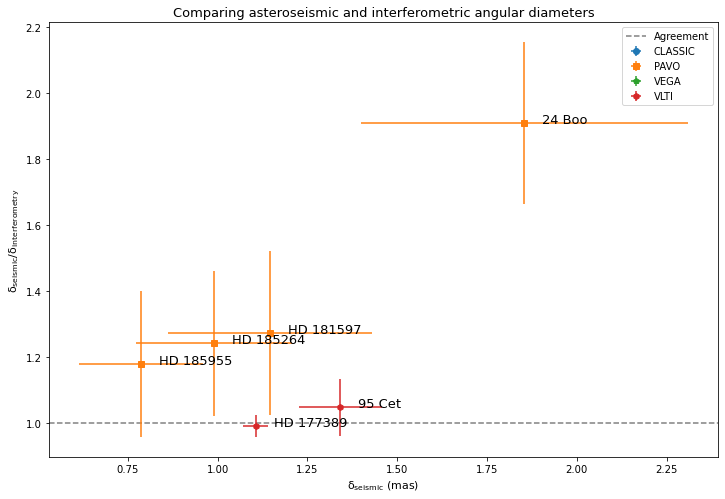

In [16]:
"""
This plot is using the raw output from the SYD-PYpline. This may produce strange results as the pipeline often times can not measure deltanu as accurately.
"""

# Filter measurements by instrument
classic = measurement_sheet[measurement_sheet["Instrument"] == "CLASSIC"]
pavo = measurement_sheet[measurement_sheet["Instrument"] == "PAVO"]
vega = measurement_sheet[measurement_sheet["Instrument"] == "VEGA"]
vlti = measurement_sheet[measurement_sheet["Instrument"] == "VLTI"]

# Initialise figure
fig = plt.figure(figsize=(12, 8))
# Agreement line
plt.axhline(1.0, c="gray", linestyle="dashed", zorder=0)
# Classic
plt.errorbar(classic["seismic angular diameter (mas)"], classic["Ratio"], xerr=classic["seismic angular diameter error (mas)"], yerr=classic["Ratio error"], fmt="o", zorder=1)
# PAVO
plt.errorbar(pavo["seismic angular diameter (mas)"], pavo["Ratio"], xerr=pavo["seismic angular diameter error (mas)"], yerr=pavo["Ratio error"], fmt="s", zorder=1)
# VEGA
plt.errorbar(vega["seismic angular diameter (mas)"], vega["Ratio"], xerr=vega["seismic angular diameter error (mas)"], yerr=vega["Ratio error"], fmt="p", zorder=1)
# VLTI
plt.errorbar(vlti["seismic angular diameter (mas)"], vlti["Ratio"], xerr=vlti["seismic angular diameter error (mas)"], yerr=vlti["Ratio error"], fmt="h", zorder=1)

# Labels
plt.xlabel(r"$\rm \delta_{seismic}$ (mas)", fontsize=11)
plt.ylabel(r"$\rm \delta_{seismic}/\delta_{interferometry}$", fontsize=11)
plt.title("Comparing asteroseismic and interferometric angular diameters", fontsize=13)
plt.legend(["Agreement", "CLASSIC", "PAVO", "VEGA", "VLTI"]);

# Annotate points with names
for idx in measurement_sheet.index.values:
    plt.annotate(measurement_sheet.loc[idx, "Main ID"], (measurement_sheet.loc[idx, "seismic angular diameter (mas)"] + 0.05, measurement_sheet.loc[idx, "Ratio"]), fontsize=13)
# Save
if save:
    plt.savefig(f"{plot_output}/{save_name}_raw.png", dpi=300)

In [17]:
# Save processed raw data into another file to remeasure deltanu i.e. using DeltanuMeasurer.ipynb
measurement_sheet.to_csv(f"{data_output}/{save_name}_data.csv", index=False)

In [18]:
# Now recalculate ratios using remeasured deltanus

# Input comparison_data.csv
input_file = "../Data/Comparison/twt_comparison_data.csv"
# Plot data file containing data on the processed targets
reference_file = "../Data/tim_white_plot_data_v1.csv"
# Plot output folder
plot_output = "../Data/Plots/Comparison"
# Save name
save_name = "twt_comparison"
# Save flag
save = False

In [19]:
# Open data file containing remeasured deltanus
measurement_sheet = pd.read_csv(input_file)
measurement_sheet

,Star,Main ID,TIC,Diam,Err,Reference,Instrument,SpT,numax (muHz),numax error (muHz),dnu (muHz),dnu error (muHz),seismic angular diameter (mas),seismic angular diameter error (mas),Ratio,Ratio error
0,HD 20559,95 Cet,279049424,1.280,0.012,Rains et al. 2020,VLTI,G9IV,53.185981,0.542571,5.553882,0.192161,1.341022,0.115860,1.047673,0.086904
1,HD 127243,24 Boo,441712711,0.971,0.007,Karovicova et al. 2020,PAVO,G4III-IVFe-1,25.968836,1.552478,2.736412,0.310496,1.853947,0.454962,1.909317,0.245507
2,HD 177389,HD 177389,382276084,1.117,0.015,Rains et al. 2020,VLTI,K0IV,285.298340,2.921803,18.957837,0.169380,1.106284,0.034508,0.990406,0.033960
3,HD 181597,HD 181597,416282724,0.901,0.016,unpublished smear,PAVO,K1III,24.409217,1.904693,2.784332,0.317449,1.146096,0.284608,1.272027,0.248963
4,HD 185264,HD 185264,27006649,0.797,0.016,unpublished,PAVO,G9III,33.830168,2.539579,3.264548,0.317447,0.989840,0.215953,1.241957,0.219091
5,HD 185955,HD 185955,271353707,0.668,0.011,unpublished,PAVO,G9II-III,83.719191,4.602999,6.228884,0.634896,0.787098,0.173171,1.178291,0.220627


In [20]:
# Calculate angular diameters again
for idx, (tic_number, numax, numax_err, dnu, dnu_err) in enumerate(measurement_sheet[["TIC", "numax (muHz)", "numax error (muHz)", "dnu (muHz)", "dnu error (muHz)"]].values):
    query_result = Catalogs.query_criteria(catalog="Tic", ID=int(tic_number))
    teff = query_result["Teff"][0]
    teff_err = query_result["e_Teff"][0]
    dist = query_result["d"][0]
    dist_err = query_result["e_d"][0]
    ang_diam, ang_diam_err = calculate_angular_diameter(numax, numax_err, dnu, dnu_err, teff, teff_err, dist, dist_err)
    measurement_sheet.loc[idx, "seismic angular diameter (mas)"] = ang_diam
    measurement_sheet.loc[idx, "seismic angular diameter error (mas)"] = ang_diam_err
measurement_sheet["Ratio"] = measurement_sheet["seismic angular diameter (mas)"]/measurement_sheet["Diam"]
measurement_sheet["Ratio error"] = np.sqrt(np.power(measurement_sheet["Err"]/measurement_sheet["Diam"], 2) + np.power(measurement_sheet["seismic angular diameter error (mas)"]/measurement_sheet["seismic angular diameter (mas)"], 2))
measurement_sheet

,Star,Main ID,TIC,Diam,Err,Reference,Instrument,SpT,numax (muHz),numax error (muHz),dnu (muHz),dnu error (muHz),seismic angular diameter (mas),seismic angular diameter error (mas),Ratio,Ratio error
0,HD 20559,95 Cet,279049424,1.280,0.012,Rains et al. 2020,VLTI,G9IV,53.185981,0.542571,5.553882,0.192161,1.341022,0.115860,1.047673,0.086904
1,HD 127243,24 Boo,441712711,0.971,0.007,Karovicova et al. 2020,PAVO,G4III-IVFe-1,25.968836,1.552478,2.736412,0.310496,1.853947,0.454962,1.909317,0.245507
2,HD 177389,HD 177389,382276084,1.117,0.015,Rains et al. 2020,VLTI,K0IV,285.298340,2.921803,18.957837,0.169380,1.106284,0.034508,0.990406,0.033960
3,HD 181597,HD 181597,416282724,0.901,0.016,unpublished smear,PAVO,K1III,24.409217,1.904693,2.784332,0.317449,1.146096,0.284608,1.272027,0.248963
4,HD 185264,HD 185264,27006649,0.797,0.016,unpublished,PAVO,G9III,33.830168,2.539579,3.264548,0.317447,0.989840,0.215953,1.241957,0.219091
5,HD 185955,HD 185955,271353707,0.668,0.011,unpublished,PAVO,G9II-III,83.719191,4.602999,6.228884,0.634896,0.787098,0.173171,1.178291,0.220627


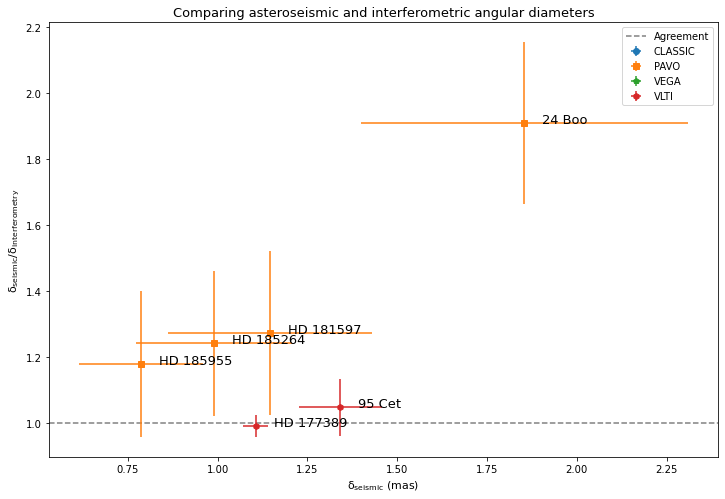

In [21]:
"""This plot has seismic angular diameter on the x-axis"""
# Filter measurements by instrument
classic = measurement_sheet[measurement_sheet["Instrument"] == "CLASSIC"]
pavo = measurement_sheet[measurement_sheet["Instrument"] == "PAVO"]
vega = measurement_sheet[measurement_sheet["Instrument"] == "VEGA"]
vlti = measurement_sheet[measurement_sheet["Instrument"] == "VLTI"]

# Initialise figure
fig = plt.figure(figsize=(12, 8))
# Agreement line
plt.axhline(1.0, c="gray", linestyle="dashed", zorder=0)
# Classic
plt.errorbar(classic["seismic angular diameter (mas)"], classic["Ratio"], xerr=classic["seismic angular diameter error (mas)"], yerr=classic["Ratio error"], fmt="o", zorder=1)
# PAVO
plt.errorbar(pavo["seismic angular diameter (mas)"], pavo["Ratio"], xerr=pavo["seismic angular diameter error (mas)"], yerr=pavo["Ratio error"], fmt="s", zorder=1)
# VEGA
plt.errorbar(vega["seismic angular diameter (mas)"], vega["Ratio"], xerr=vega["seismic angular diameter error (mas)"], yerr=vega["Ratio error"], fmt="p", zorder=1)
# VLTI
plt.errorbar(vlti["seismic angular diameter (mas)"], vlti["Ratio"], xerr=vlti["seismic angular diameter error (mas)"], yerr=vlti["Ratio error"], fmt="h", zorder=1)

# Labels
plt.xlabel(r"$\rm \delta_{seismic}$ (mas)", fontsize=11)
plt.ylabel(r"$\rm \delta_{seismic}/\delta_{interferometry}$", fontsize=11)
plt.title("Comparing asteroseismic and interferometric angular diameters", fontsize=13)
plt.legend(["Agreement", "CLASSIC", "PAVO", "VEGA", "VLTI"]);

# Annotate
for idx in measurement_sheet.index.values:
    plt.annotate(measurement_sheet.loc[idx, "Main ID"], (measurement_sheet.loc[idx, "seismic angular diameter (mas)"] + 0.05, measurement_sheet.loc[idx, "Ratio"]), fontsize=13)

# Save
if save:
    plt.savefig(f"{plot_output}/{save_name}.png", dpi=300)

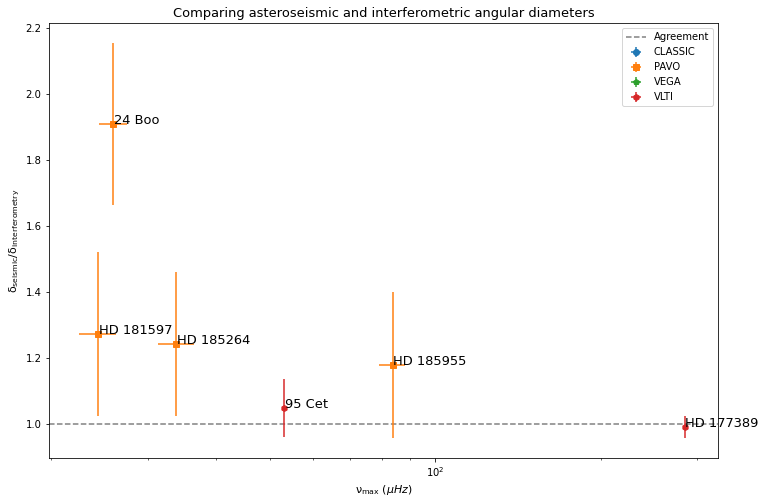

In [22]:
"""This plot has numax on the x-axis on a log-scale"""
# Filter measurements by instrument
classic = measurement_sheet[measurement_sheet["Instrument"] == "CLASSIC"]
pavo = measurement_sheet[measurement_sheet["Instrument"] == "PAVO"]
vega = measurement_sheet[measurement_sheet["Instrument"] == "VEGA"]
vlti = measurement_sheet[measurement_sheet["Instrument"] == "VLTI"]

# Initialise figure
fig = plt.figure(figsize=(12, 8))
# Agreement line
plt.axhline(1.0, c="gray", linestyle="dashed", zorder=0)
# CLASSIC
plt.errorbar(classic["numax (muHz)"], classic["Ratio"], xerr=classic["numax error (muHz)"], yerr=classic["Ratio error"], fmt="o", zorder=1)
# PAVO
plt.errorbar(pavo["numax (muHz)"], pavo["Ratio"], xerr=pavo["numax error (muHz)"], yerr=pavo["Ratio error"], fmt="s", zorder=1)
# VEGA
plt.errorbar(vega["numax (muHz)"], vega["Ratio"], xerr=vega["numax error (muHz)"], yerr=vega["Ratio error"], fmt="p", zorder=1)
# VLTI
plt.errorbar(vlti["numax (muHz)"], vlti["Ratio"], xerr=vlti["numax error (muHz)"], yerr=vlti["Ratio error"], fmt="h", zorder=1)

# Labels
plt.xlabel(r"$\rm \nu_{max}$ ($\mu Hz$)", fontsize=11)
plt.ylabel(r"$\rm \delta_{seismic}/\delta_{interferometry}$", fontsize=11)
plt.title("Comparing asteroseismic and interferometric angular diameters", fontsize=13)
plt.legend(["Agreement", "CLASSIC", "PAVO", "VEGA", "VLTI"]);
plt.xscale("log")

# Annotate
for idx in measurement_sheet.index.values:
    plt.annotate(measurement_sheet.loc[idx, "Main ID"], (measurement_sheet.loc[idx, "numax (muHz)"] + 0.05, measurement_sheet.loc[idx, "Ratio"]), fontsize=13)

# Save
if save:
    plt.savefig(f"{plot_output}/{save_name}_numax.png", dpi=300)

In [23]:
# Add effective temperatures if not yet added (from TIC)
temperatures = []
temperatures_error = []
for idx in measurement_sheet.index.values:
    query_result = Catalogs.query_criteria(catalog="Tic", ID=int(measurement_sheet.loc[idx, "TIC"]))
    teff = float(query_result["Teff"][0])
    teff_err = float(query_result["e_Teff"][0])
    temperatures.append(teff)
    temperatures_error.append(teff_err)

if "Teff (K)" not in measurement_sheet.columns:
    measurement_sheet.insert(8, "Teff (K)", temperatures)
else:
    measurement_sheet["Teff (K)"] = temperatures
if "Teff error (K)" not in measurement_sheet.columns:
    measurement_sheet.insert(9, "Teff error (K)", temperatures_error)
else:
    measurement_sheet["Teff error (K)"] = temperatures_error
measurement_sheet

,Star,Main ID,TIC,Diam,Err,Reference,Instrument,SpT,Teff (K),Teff error (K),numax (muHz),numax error (muHz),dnu (muHz),dnu error (muHz),seismic angular diameter (mas),seismic angular diameter error (mas),Ratio,Ratio error
0,HD 20559,95 Cet,279049424,1.280,0.012,Rains et al. 2020,VLTI,G9IV,4713.00,131.0000,53.185981,0.542571,5.553882,0.192161,1.341022,0.115860,1.047673,0.086904
1,HD 127243,24 Boo,441712711,0.971,0.007,Karovicova et al. 2020,PAVO,G4III-IVFe-1,5025.78,24.7354,25.968836,1.552478,2.736412,0.310496,1.853947,0.454962,1.909317,0.245507
2,HD 177389,HD 177389,382276084,1.117,0.015,Rains et al. 2020,VLTI,K0IV,5059.60,21.9087,285.298340,2.921803,18.957837,0.169380,1.106284,0.034508,0.990406,0.033960
3,HD 181597,HD 181597,416282724,0.901,0.016,unpublished smear,PAVO,K1III,4663.00,56.0000,24.409217,1.904693,2.784332,0.317449,1.146096,0.284608,1.272027,0.248963
4,HD 185264,HD 185264,27006649,0.797,0.016,unpublished,PAVO,G9III,4787.65,74.5709,33.830168,2.539579,3.264548,0.317447,0.989840,0.215953,1.241957,0.219091
5,HD 185955,HD 185955,271353707,0.668,0.011,unpublished,PAVO,G9II-III,5117.00,122.0000,83.719191,4.602999,6.228884,0.634896,0.787098,0.173171,1.178291,0.220627


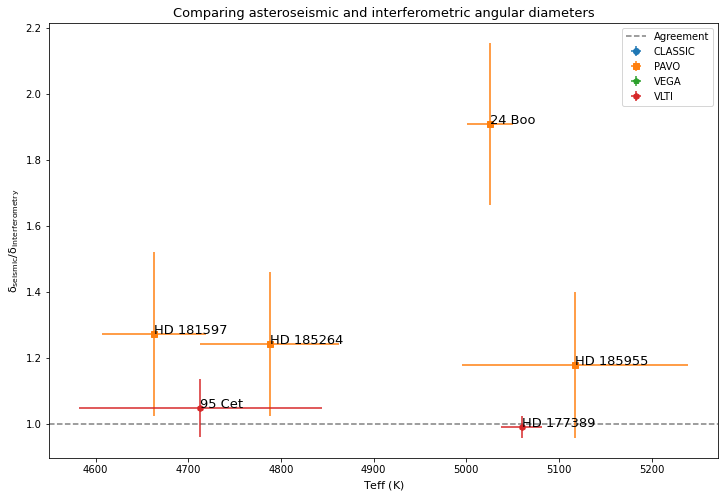

In [25]:
"""This plot has effective temperature on the x-axis"""
# Filter measurements by instrument
classic = measurement_sheet[measurement_sheet["Instrument"] == "CLASSIC"]
pavo = measurement_sheet[measurement_sheet["Instrument"] == "PAVO"]
vega = measurement_sheet[measurement_sheet["Instrument"] == "VEGA"]
vlti = measurement_sheet[measurement_sheet["Instrument"] == "VLTI"]

# Initialise figure
fig = plt.figure(figsize=(12, 8))
# Agreement line
plt.axhline(1.0, c="gray", linestyle="dashed", zorder=0)
# CLASSIC
plt.errorbar(classic["Teff (K)"], classic["Ratio"], xerr=classic["Teff error (K)"], yerr=classic["Ratio error"], fmt="o", zorder=1)
# PAVO
plt.errorbar(pavo["Teff (K)"], pavo["Ratio"], xerr=pavo["Teff error (K)"], yerr=pavo["Ratio error"], fmt="s", zorder=1)
# VEGA
plt.errorbar(vega["Teff (K)"], vega["Ratio"], xerr=vega["Teff error (K)"], yerr=vega["Ratio error"], fmt="p", zorder=1)
# VLTI
plt.errorbar(vlti["Teff (K)"], vlti["Ratio"], xerr=vlti["Teff error (K)"], yerr=vlti["Ratio error"], fmt="h", zorder=1)

# Labels
plt.xlabel(r"$\rm Teff$ (K)", fontsize=11)
plt.ylabel(r"$\rm \delta_{seismic}/\delta_{interferometry}$", fontsize=11)
plt.title("Comparing asteroseismic and interferometric angular diameters", fontsize=13)
plt.legend(["Agreement", "CLASSIC", "PAVO", "VEGA", "VLTI"])

# Annotate
for idx in measurement_sheet.index.values:
    plt.annotate(measurement_sheet.loc[idx, "Main ID"], (measurement_sheet.loc[idx, "Teff (K)"] + 0.05, measurement_sheet.loc[idx, "Ratio"]), fontsize=13)

# Save
if save:
    plt.savefig(f"{plot_output}/{save_name}_teff.png", dpi=300)

In [26]:
"""Combine data from both target lists"""

# Input comparison data files
huber_file = "../Data/Comparison/dht_comparison_data.csv"
white_file = "../Data/Comparison/twt_comparison_data.csv"

# Plot output folder
plot_output = "../Data/Plots/Comparison"
# Save name
save_name = "all_comparison"
# Save flag
save = False

In [29]:
huber_targets = pd.read_csv(huber_file)
white_targets = pd.read_csv(white_file)
measurement_sheet = pd.concat([huber_targets, white_targets], ignore_index=True)
measurement_sheet

,Star,Main ID,TIC,Diam,Err,Reference,Instrument,SpT,Teff (K),Teff error (K),numax (muHz),numax error (muHz),dnu (muHz),dnu error (muHz),seismic angular diameter (mas),seismic angular diameter error (mas),Ratio,Ratio error
0,HD 11964,HD 11964,24978373,0.607,0.015,"Boyajian et al. 2013, ApJ, 771, 40",CLASSIC,G8IV,5303.00,105.53200,900.371881,4.235269,50.900000,0.200000,0.546185,0.011557,0.899810,0.032533
1,HD 11964,HD 11964,24978373,0.611,0.081,"Baines et al. 2008, ApJ, 680, 728",CLASSIC,G8IV,5303.00,105.53200,900.371881,4.235269,50.900000,0.200000,0.546185,0.011557,0.893920,0.134248
2,HD 32518,HD 32518,310836777,0.851,0.022,"E.K. Baines, et al., The Astrophysical Journal...",CLASSIC,K1III,4661.00,53.00000,30.199810,1.377671,3.850000,0.050000,0.824458,0.053209,0.968811,0.069523
3,HD 102328,HD 102328,459186567,1.606,0.006,"E.K. Baines, et al., The Astrophysical Journal...",CLASSIC,K2.5IIIbCN1,4525.76,62.71750,27.760358,0.797627,3.250000,0.050000,1.896264,0.110787,1.180737,0.058543
4,HD 103605,66 UMa,284627497,1.098,0.010,"E.K. Baines, et al., The Astrophysical Journal...",CLASSIC,K1III,4613.12,5.96330,30.773139,0.677984,3.790000,0.040000,1.094585,0.050024,0.996890,0.046600
5,HD 117176,70 Vir,95473936,1.009,0.024,"Baines et al. 2008, ApJ, 680, 728",CLASSIC,G4Va,5495.00,112.59400,940.391108,20.685845,54.000000,0.200000,0.966586,0.036368,0.957964,0.044514
6,HD 117176,70 Vir,95473936,0.998,0.005,"S. R. Kane, et al., The Astrophysical Journal,...",CLASSIC,G4Va,5495.00,112.59400,940.391108,20.685845,54.000000,0.200000,0.966586,0.036368,0.968523,0.037958
7,HD 137759,iot Dra,165722603,3.596,0.015,"E.K. Baines, et al., The Astrophysical Journal...",CLASSIC,K2III,4534.07,6.13359,38.492260,0.696732,4.020000,0.020000,3.705473,0.170650,1.030443,0.046242
8,HD 139357,HD 139357,224312054,1.073,0.013,"E.K. Baines, et al., The Astrophysical Journal...",CLASSIC,K4III:,4601.92,27.90470,40.285523,0.774766,4.220000,0.030000,0.990928,0.038940,0.923512,0.041122
9,HD 142091,kap CrB,334753043,1.456,0.020,White et al. 2018,PAVO,K1IVa,4871.00,25.00000,204.956649,4.535361,14.720000,0.060000,1.589308,0.058245,1.091558,0.039138


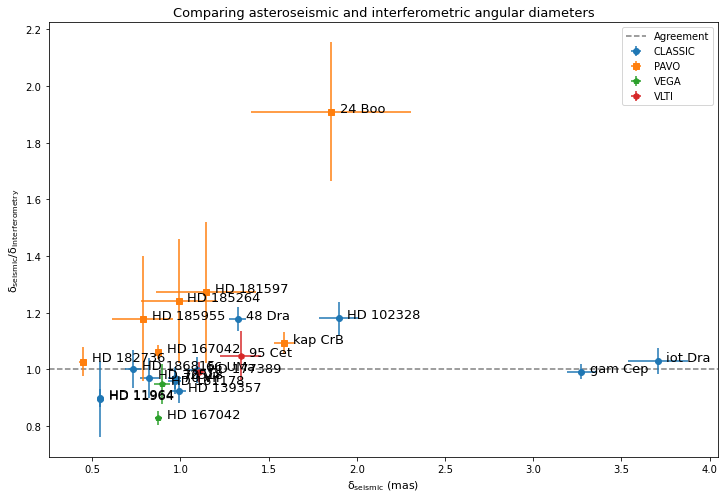

In [30]:
"""This plot has seismic angular diameter on the x-axis"""
# Filter measurements by instrument
classic = measurement_sheet[measurement_sheet["Instrument"] == "CLASSIC"]
pavo = measurement_sheet[measurement_sheet["Instrument"] == "PAVO"]
vega = measurement_sheet[measurement_sheet["Instrument"] == "VEGA"]
vlti = measurement_sheet[measurement_sheet["Instrument"] == "VLTI"]

# Initialise figure
fig = plt.figure(figsize=(12, 8))
# Agreement line
plt.axhline(1.0, c="gray", linestyle="dashed", zorder=0)
# CLASSIC
plt.errorbar(classic["seismic angular diameter (mas)"], classic["Ratio"], xerr=classic["seismic angular diameter error (mas)"], yerr=classic["Ratio error"], fmt="o", zorder=1)
# PAVO
plt.errorbar(pavo["seismic angular diameter (mas)"], pavo["Ratio"], xerr=pavo["seismic angular diameter error (mas)"], yerr=pavo["Ratio error"], fmt="s", zorder=1)
# VEGA
plt.errorbar(vega["seismic angular diameter (mas)"], vega["Ratio"], xerr=vega["seismic angular diameter error (mas)"], yerr=vega["Ratio error"], fmt="p", zorder=1)
# VLTI
plt.errorbar(vlti["seismic angular diameter (mas)"], vlti["Ratio"], xerr=vlti["seismic angular diameter error (mas)"], yerr=vlti["Ratio error"], fmt="h", zorder=1)

# Labels
plt.xlabel(r"$\rm \delta_{seismic}$ (mas)", fontsize=11)
plt.ylabel(r"$\rm \delta_{seismic}/\delta_{interferometry}$", fontsize=11)
plt.title("Comparing asteroseismic and interferometric angular diameters", fontsize=13)
plt.legend(["Agreement", "CLASSIC", "PAVO", "VEGA", "VLTI"]);

# Annotate
for idx in measurement_sheet.index.values:
    plt.annotate(measurement_sheet.loc[idx, "Main ID"], (measurement_sheet.loc[idx, "seismic angular diameter (mas)"] + 0.05, measurement_sheet.loc[idx, "Ratio"]), fontsize=13)

# Save
if save:
    plt.savefig(f"{plot_output}/{save_name}.png", dpi=300)

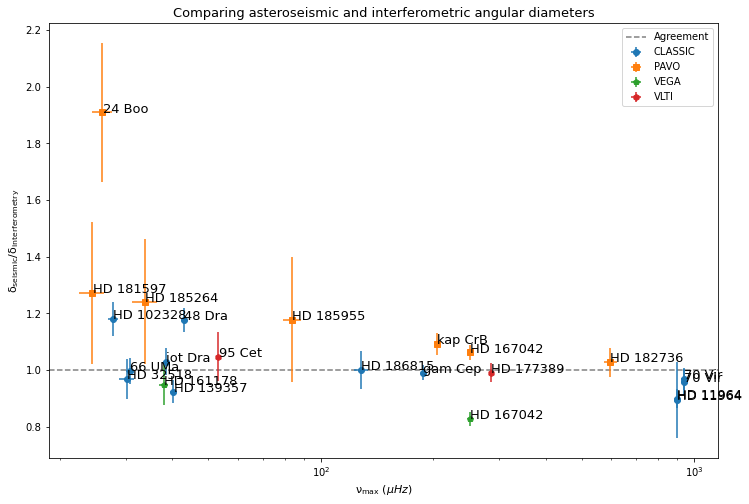

In [31]:
"""This plot has numax on the x-axis on a log-scale"""
# Filter measurements by instrument
classic = measurement_sheet[measurement_sheet["Instrument"] == "CLASSIC"]
pavo = measurement_sheet[measurement_sheet["Instrument"] == "PAVO"]
vega = measurement_sheet[measurement_sheet["Instrument"] == "VEGA"]
vlti = measurement_sheet[measurement_sheet["Instrument"] == "VLTI"]

# Initialise figure
fig = plt.figure(figsize=(12, 8))
# Agreement line
plt.axhline(1.0, c="gray", linestyle="dashed", zorder=0)
# CLASSIC
plt.errorbar(classic["numax (muHz)"], classic["Ratio"], xerr=classic["numax error (muHz)"], yerr=classic["Ratio error"], fmt="o", zorder=1)
# PAVO
plt.errorbar(pavo["numax (muHz)"], pavo["Ratio"], xerr=pavo["numax error (muHz)"], yerr=pavo["Ratio error"], fmt="s", zorder=1)
# VEGA
plt.errorbar(vega["numax (muHz)"], vega["Ratio"], xerr=vega["numax error (muHz)"], yerr=vega["Ratio error"], fmt="p", zorder=1)
# VLTI
plt.errorbar(vlti["numax (muHz)"], vlti["Ratio"], xerr=vlti["numax error (muHz)"], yerr=vlti["Ratio error"], fmt="h", zorder=1)

# Labels
plt.xlabel(r"$\rm \nu_{max}$ ($\mu Hz$)", fontsize=11)
plt.ylabel(r"$\rm \delta_{seismic}/\delta_{interferometry}$", fontsize=11)
plt.title("Comparing asteroseismic and interferometric angular diameters", fontsize=13)
plt.legend(["Agreement", "CLASSIC", "PAVO", "VEGA", "VLTI"])
plt.xscale("log")

# Annotate
for idx in measurement_sheet.index.values:
    plt.annotate(measurement_sheet.loc[idx, "Main ID"], (measurement_sheet.loc[idx, "numax (muHz)"] + 0.05, measurement_sheet.loc[idx, "Ratio"]), fontsize=13)

# Save
if save:
    plt.savefig(f"{plot_output}/{save_name}_numax.png", dpi=300)

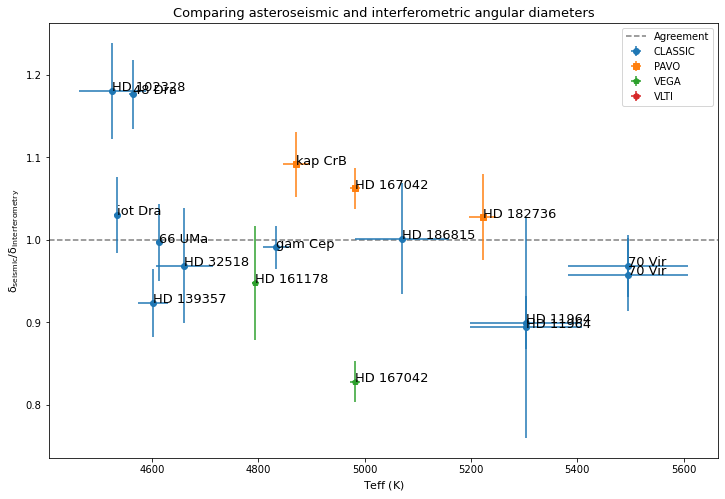

In [33]:
"""This plot has effective temperature on the x-axis"""
# Filter measurements by instrument
classic = measurement_sheet[measurement_sheet["Instrument"] == "CLASSIC"]
pavo = measurement_sheet[measurement_sheet["Instrument"] == "PAVO"]
vega = measurement_sheet[measurement_sheet["Instrument"] == "VEGA"]
vlti = measurement_sheet[measurement_sheet["Instrument"] == "VLTI"]

# Initialise figure
fig = plt.figure(figsize=(12, 8))
# Agreement line
plt.axhline(1.0, c="gray", linestyle="dashed", zorder=0)
# CLASSIC
plt.errorbar(classic["Teff (K)"], classic["Ratio"], xerr=classic["Teff error (K)"], yerr=classic["Ratio error"], fmt="o", zorder=1)
# PAVO
plt.errorbar(pavo["Teff (K)"], pavo["Ratio"], xerr=pavo["Teff error (K)"], yerr=pavo["Ratio error"], fmt="s", zorder=1)
# VEGA
plt.errorbar(vega["Teff (K)"], vega["Ratio"], xerr=vega["Teff error (K)"], yerr=vega["Ratio error"], fmt="p", zorder=1)
# VLTI
plt.errorbar(vlti["Teff (K)"], vlti["Ratio"], xerr=vlti["Teff error (K)"], yerr=vlti["Ratio error"], fmt="h", zorder=1)

# Labels
plt.xlabel(r"$\rm Teff$ (K)", fontsize=11)
plt.ylabel(r"$\rm \delta_{seismic}/\delta_{interferometry}$", fontsize=11)
plt.title("Comparing asteroseismic and interferometric angular diameters", fontsize=13)
plt.legend(["Agreement", "CLASSIC", "PAVO", "VEGA", "VLTI"])

# Annotate
for idx in measurement_sheet.index.values:
    plt.annotate(measurement_sheet.loc[idx, "Main ID"], (measurement_sheet.loc[idx, "Teff (K)"] + 0.05, measurement_sheet.loc[idx, "Ratio"]), fontsize=13)

# Save
if save:
    plt.savefig(f"{plot_output}/{save_name}_teff.png", dpi=300)